In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
%matplotlib inline

In [2]:
np.random.seed(0)
from sklearn import datasets

n_samples = 120
X, Y = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=[(0,5),(3,0)], random_state=0)

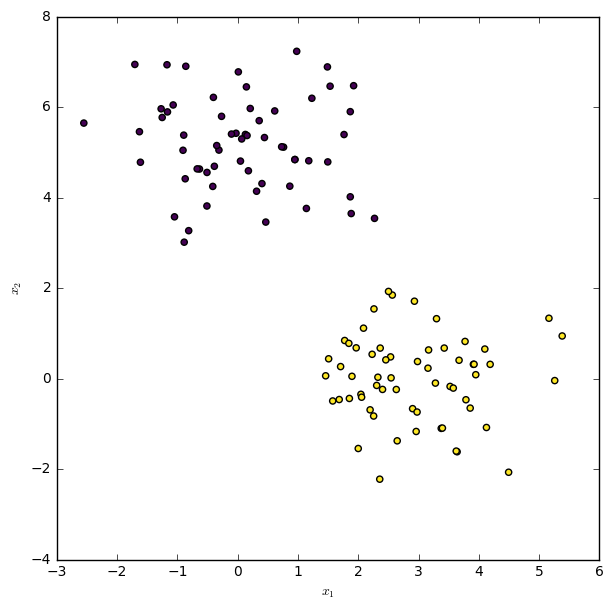

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [4]:
X.shape

(120, 2)

In [5]:
Y = np.reshape(Y, (n_samples, 1))
Y.shape

(120, 1)

In [6]:
# Test Set:
x_test = np.array([[-1, 4], [4, -2], [4, -4], [4, 6], [2, 2]])
y_test = np.array([[0], [1], [1], [0], [1]])

In [7]:
# Graph Input
x = tf.placeholder(tf.float32, [None, 2]) # Two Features
y = tf.placeholder(tf.float32, [None, 1]) # Output

In [8]:
# Set model weights
W = tf.Variable(tf.truncated_normal([2, 1]))
b = tf.Variable(tf.truncated_normal([1]))

In [9]:
# Model
prediction = tf.sigmoid(tf.matmul(x,W) + b)

In [10]:
# Hyper-Parameters
learning_rate = 0.000001
training_epochs = 1000
batch_size = 120
display_step = 100

In [11]:
# Error computation for logistic regression
loss = tf.reduce_sum(tf.abs(y - prediction))/n_samples

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [12]:
# Initialize the variables
init = tf.global_variables_initializer()

In [13]:
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        overall_loss = 0
        for i in range(0, n_samples, batch_size):
            batch_xs = X[i : i + batch_size]
            batch_ys = Y[i : i + batch_size]

            _, batch_loss = sess.run([optimizer, loss], feed_dict={x: batch_xs, y: batch_ys})
            
            # Compute average loss
            overall_loss += batch_loss / batch_size
        
        # Display epoch and loss
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Loss=", "{:.9f}".format(overall_loss))

    print("Training Done!")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    print("Accuracy:", accuracy.eval({x: x_test, y: y_test}))

Epoch: 0100 Loss= 0.005360644
Epoch: 0200 Loss= 0.005360378
Epoch: 0300 Loss= 0.005360111
Epoch: 0400 Loss= 0.005359846
Epoch: 0500 Loss= 0.005359580
Epoch: 0600 Loss= 0.005359315
Epoch: 0700 Loss= 0.005359048
Epoch: 0800 Loss= 0.005358782
Epoch: 0900 Loss= 0.005358516
Epoch: 1000 Loss= 0.005358251
Training Done!
Accuracy: 1.0
